In [ ]:
!pip install catboost
!pip install scikit-learn
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
from catboost.datasets import titanic
import numpy as np

train_df, test_df = titanic()

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(train_df.shape)

(891, 12)


In [ ]:
train_target = pd.DataFrame(train_df['Survived'])
print(train_target)

     Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]


In [ ]:
del train_df['Survived']

In [ ]:
del train_df['Name']
del train_df['Ticket']
del train_df['Cabin']
del train_df['Embarked']
del test_df['Name']
del test_df['Ticket']
del test_df['Cabin']
del test_df['Embarked']
print(train_df.shape)

(891, 8)


In [ ]:
train_df.fillna(-999, inplace=True)
test_df.fillna(-999, inplace=True)

In [ ]:
train_df = train_df.replace("male", 0)
train_df = train_df.replace("female", 1)

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
print(train_df)

     PassengerId  Pclass  Sex    Age  SibSp  Parch     Fare
0              1       3    0   22.0      1      0   7.2500
1              2       1    1   38.0      1      0  71.2833
2              3       3    1   26.0      0      0   7.9250
3              4       1    1   35.0      1      0  53.1000
4              5       3    0   35.0      0      0   8.0500
..           ...     ...  ...    ...    ...    ...      ...
886          887       2    0   27.0      0      0  13.0000
887          888       1    1   19.0      0      0  30.0000
888          889       3    1 -999.0      1      2  23.4500
889          890       1    0   26.0      0      0  30.0000
890          891       3    0   32.0      0      0   7.7500

[891 rows x 7 columns]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    train_df, train_target, stratify=train_target, random_state=42)
clf = DecisionTreeClassifier(max_depth=4, random_state=0)
clf = clf.fit(X_train, y_train)

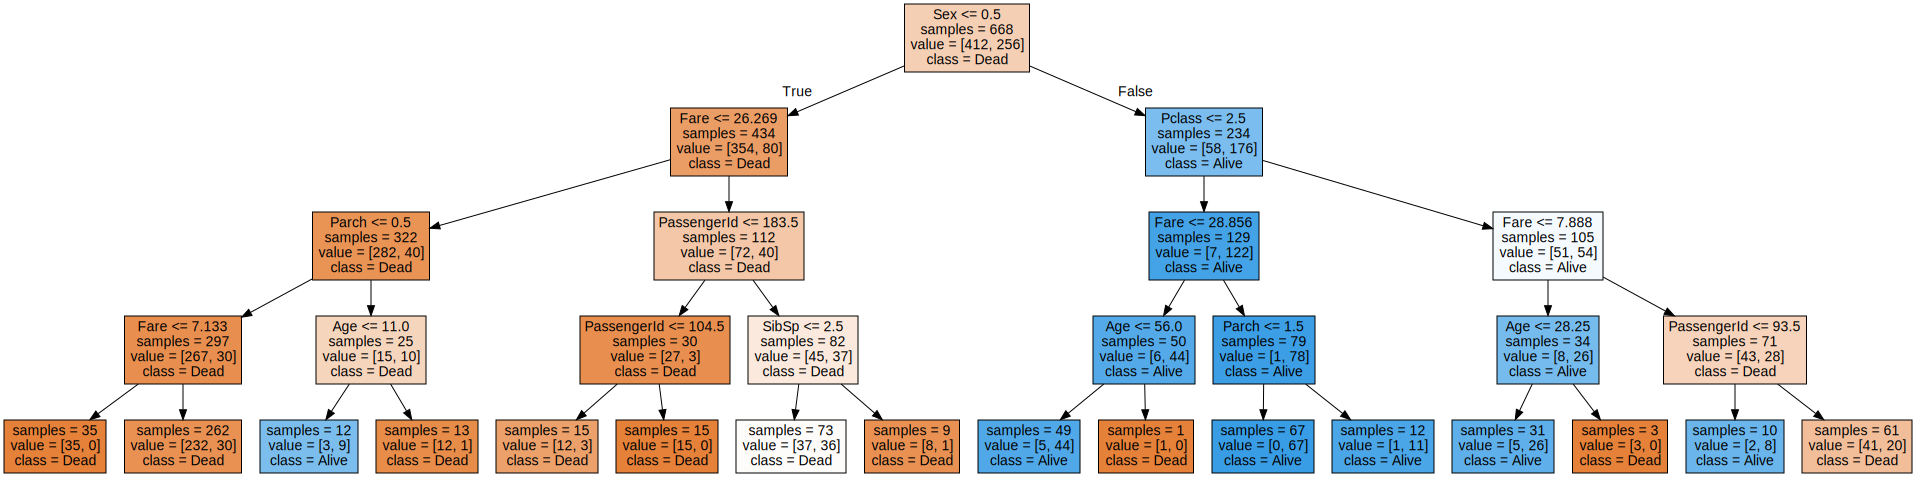

In [ ]:
export_graphviz(clf, out_file="tree.dot", class_names=["Dead", "Alive"],
                feature_names=clf.feature_names_in_, impurity=False, filled=True)
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
print("Важности признаков:\n{}".format(clf.feature_importances_))

Важности признаков:
[0.06007273 0.13144316 0.59791567 0.06759558 0.01426529 0.02600798
 0.10269959]


0.7847533632286996


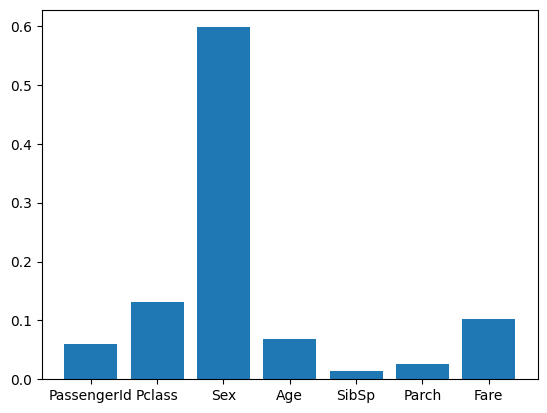

In [ ]:
plt.bar(clf.feature_names_in_, clf.feature_importances_)
print(clf.score(X_test, y_test))

0.695067264573991


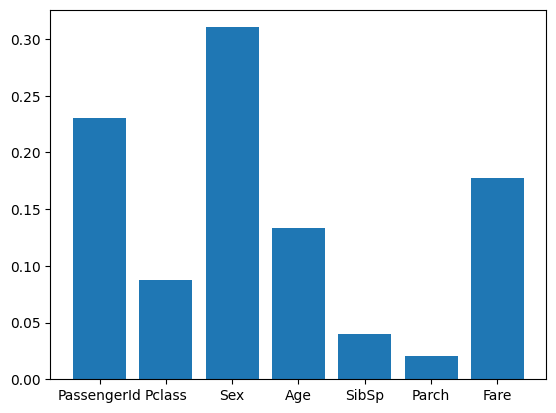

In [ ]:
train_df1, test_df1 = titanic()
train_target1 = pd.DataFrame(train_df1['Survived'])
del train_df1['Survived']
del train_df1['Name']
del train_df1['Ticket']
del train_df1['Cabin']
del train_df1['Embarked']
del test_df1['Name']
del test_df1['Ticket']
del test_df1['Cabin']
del test_df1['Embarked']
train_df1.fillna(-999, inplace=True)
test_df1.fillna(-999, inplace=True)
train_df1 = train_df1.replace("male", 0)
train_df1 = train_df1.replace("female", 1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    train_df1, train_target1, stratify=train_target1, random_state=42)
clf1 = DecisionTreeClassifier(random_state=0)
clf1 = clf1.fit(X_train1, y_train1)
plt.bar(clf1.feature_names_in_, clf1.feature_importances_)
print(clf1.score(X_test1, y_test1))

In [ ]:
train_df1, test_df1 = titanic()
train_target1 = pd.DataFrame(train_df1['Survived'])
del train_df1['Survived']
del train_df1['Name']
del train_df1['Ticket']
del train_df1['Cabin']
del train_df1['Embarked']
del test_df1['Name']
del test_df1['Ticket']
del test_df1['Cabin']
del test_df1['Embarked']
train_df1.fillna(-999, inplace=True)
test_df1.fillna(-999, inplace=True)
train_df1 = train_df1.replace("male", 0)
train_df1 = train_df1.replace("female", 1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    train_df1, train_target1, stratify=train_target1, random_state=42)
a=[]
b=[]
for i in range(1,20):
  clf1 = DecisionTreeClassifier(max_depth=i, random_state=0)
  clf1 = clf1.fit(X_train1, y_train1)
  a.append(clf1.score(X_test1, y_test1))
  b.append(clf1.score(X_train1, y_train1))
print(a)

[0.7668161434977578, 0.7668161434977578, 0.7802690582959642, 0.7847533632286996, 0.7802690582959642, 0.7847533632286996, 0.7757847533632287, 0.7668161434977578, 0.757847533632287, 0.7488789237668162, 0.7488789237668162, 0.7443946188340808, 0.7130044843049327, 0.7085201793721974, 0.7219730941704036, 0.7219730941704036, 0.695067264573991, 0.695067264573991, 0.695067264573991]


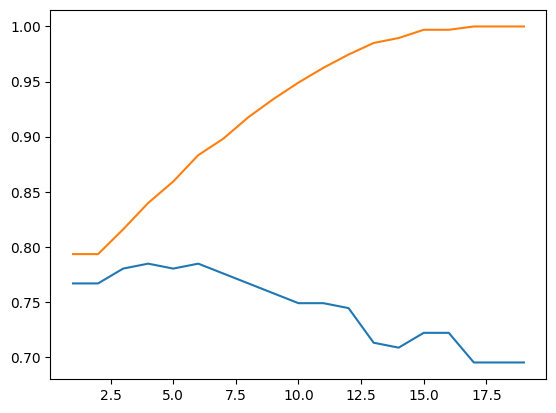

In [ ]:
plt.plot(range(1,20), a)
plt.plot(range(1,20), b)
plt.show()

In [ ]:
!pip install scikit-learn==1.1.1 -i https://pypi.tuna.tsinghua.edu.cn/simple


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.4/30.4 MB 1.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.21.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.1 which is incompatible.


In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,   random_state=66)

In [ ]:
a=[]
b=[]
for i in range(1,30):
  clf = DecisionTreeRegressor(max_depth=i, random_state=66)
  clf = clf.fit(X_train, y_train)
  knn = KNeighborsRegressor(n_neighbors=i)
  knn=knn.fit(X_train, y_train)
  a.append(clf.score(X_test, y_test))
  b.append(knn.score(X_test, y_test))
print(" Tree score: {:.4f}".format(max(a)),'\n', "Neighbors score: {:.4f}".format(max(b)))

 Tree score: 0.8262 
 Neighbors score: 0.6236


Text(0.5, 0, 'Колво соседей (Глубина)')

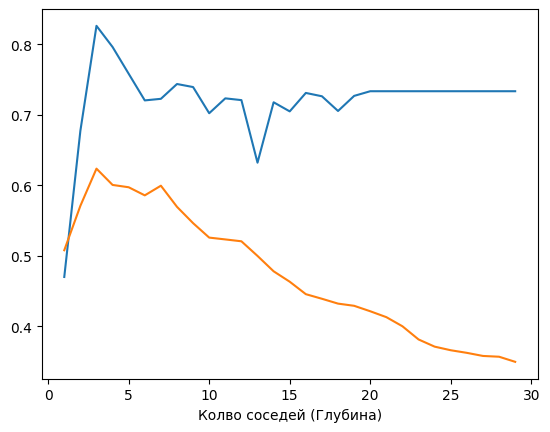

In [ ]:
plt.plot(range(1,30), a)
plt.plot(range(1,30), b)
plt.xlabel("Колво соседей (Глубина)")